# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [66]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [68]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [69]:
# Parse the HTML
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
mars_weather = soup(html, 'html.parser')


In [70]:
# Extract all rows of data
table = mars_weather.find('table', class_='table')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [71]:
# Initialize lists to store the column headings and data
headers = []
data = []

# print(data)

# Extract column headings from the table
header_row = table.find('tr')

for th in header_row.find_all('th'):
    headers.append(th.text.strip())


# Extract data rows from the table
data_rows = table.find_all('tr', class_='data-row')
for row in data_rows:
    row_data = []
    for td in row.find_all('td'):
        row_data.append(td.text.strip())
    data.append(row_data)
    
# Print the headers
# print(headers)

# Print the data
# print(data)




In [72]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_weather_df = pd.DataFrame(data=data, columns=headers)
mars_weather_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [73]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [74]:
# Change data types for data analysis
mars_weather_df[['id', 'sol', 'ls', 'month', 'min_temp', 'pressure']] = mars_weather_df[['id', 'sol', 'ls', 'month', 'min_temp', 'pressure']].\
    apply(pd.to_numeric)

mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'], format = '%Y-%m-%d')

mars_weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [75]:
#Confirm no values in DataFrame are missing
mars_weather_df.count()

id                  1867
terrestrial_date    1867
sol                 1867
ls                  1867
month               1867
min_temp            1867
pressure            1867
dtype: int64

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [76]:
# 1. How many months are there on Mars?
mars_weather_df['month'].nunique()

12

In [77]:
# 2. How many Martian days' worth of data are there?
mars_weather_df['sol'].nunique()


1867

In [78]:
# 3. What is the average low temperature by month?
avg_temp_per_month = mars_weather_df.groupby(['month'])['min_temp'].mean()
avg_temp_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

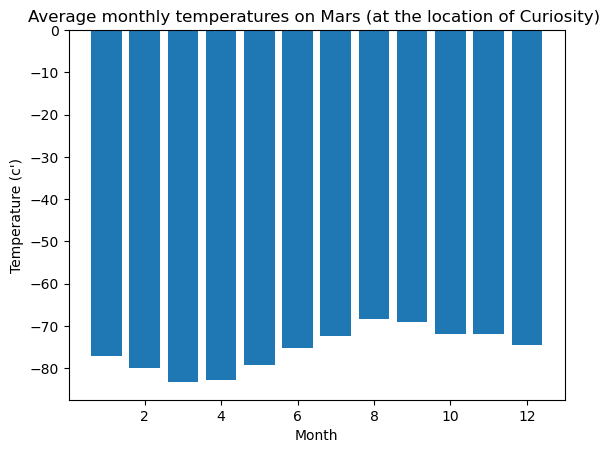

In [79]:
# Plot the average temperature by month
avg_temp_per_month_df=pd.DataFrame(avg_temp_per_month).reset_index()
avg_temp_per_month_df.columns = ['month', 'avg min temperature']
avg_temp_per_month_df
plt.bar(avg_temp_per_month_df['month'],avg_temp_per_month_df['avg min temperature'])
plt.xlabel('Month')
plt.ylabel("Temperature (c')")
plt.title('Average monthly temperatures on Mars (at the location of Curiosity) ')
plt.show()

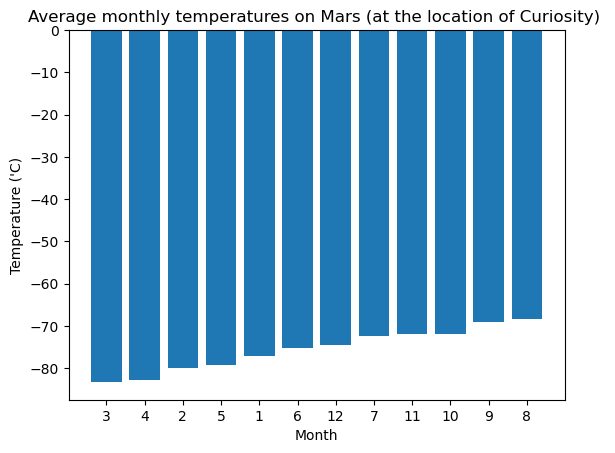

In [80]:
# Identify the coldest and hottest months in Curiosity's location by graph
avg_temp_sorted_df=avg_temp_per_month_df.sort_values('avg min temperature').reset_index(drop=True)
avg_temp_sorted_df
plt.bar(avg_temp_sorted_df.index, avg_temp_sorted_df['avg min temperature'])
plt.xticks(avg_temp_sorted_df.index, avg_temp_sorted_df['month'])
plt.xlabel('Month')
plt.ylabel("Temperature ('C)")
plt.title('Average monthly temperatures on Mars (at the location of Curiosity) ')
plt.show()

From the graph above (sorted in ascending order of temperature), it is clear that the coldest month is month 3 (average temperature of -83.3'C), and that the 'warmest' month is month 8 (average temperature of -68.4'C).

In [81]:
# confirm the hottest month in Curiosity's location
avg_temp_per_month_df.loc[avg_temp_per_month_df['avg min temperature'].idxmax()]


month                   8.000000
avg min temperature   -68.382979
Name: 7, dtype: float64

In [82]:
# confirm the coldest month in Curiosity's location
avg_temp_per_month_df.loc[avg_temp_per_month_df['avg min temperature'].idxmin()]

month                   3.000000
avg min temperature   -83.307292
Name: 2, dtype: float64

In [83]:
# 4. Average pressure by Martian month
avg_pressure_per_month = mars_weather_df.groupby(['month'])['pressure'].mean()
avg_pressure_per_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

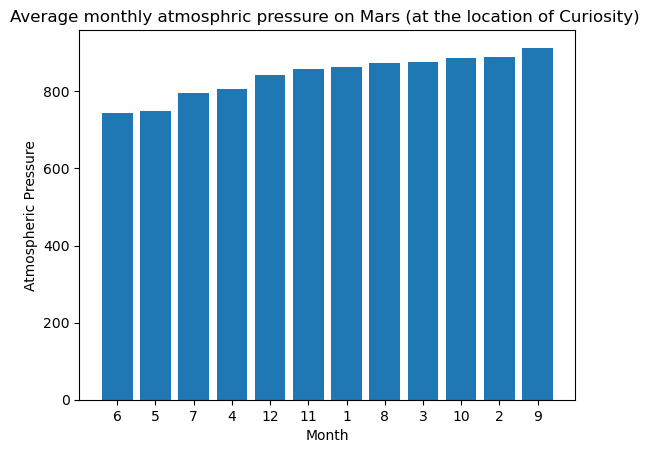

In [84]:
# Plot the average pressure by month - to tell which are the months with the highest and lowest pressures
avg_pressure_per_month_df = pd.DataFrame(avg_pressure_per_month).reset_index()
avg_pressure_per_month_df.columns = ['month', 'average pressure']
avg_pressure_sorted_df = avg_pressure_per_month_df.sort_values('average pressure').reset_index(drop=True)
plt.bar(avg_pressure_sorted_df.index, avg_pressure_sorted_df['average pressure'])
plt.xticks(avg_pressure_sorted_df.index, avg_pressure_sorted_df['month'])
plt.xlabel('Month')
plt.ylabel("Atmospheric Pressure")
plt.title('Average monthly atmosphric pressure on Mars (at the location of Curiosity) ')
plt.show()

Graph indicates that atmospheric pressure is lowest in month 6 and highest in month 9. 

In [93]:
#Graph indicates that atmospheric pressure is lowest in month 6 and highest in month 9. 
#To confirm this we can query the dataframe for highest lowest values and corresponding months:
avg_pressure_per_month_df.loc[avg_pressure_per_month_df['average pressure'].idxmax()]


month                 9.00000
average pressure    913.30597
Name: 8, dtype: float64

In [94]:
avg_pressure_per_month_df.loc[avg_pressure_per_month_df['average pressure'].idxmin()]

month                 6.000000
average pressure    745.054422
Name: 5, dtype: float64

In [87]:
#Use solar latitude ('ls') to calculate a period of a year. 
#Get the solar latitude value for the first row
initial_ls = mars_weather_df['ls'].loc[0]
#initial_ls
#Get the row reference for the next instance of the initial solar longitude contained in the variable 'initial_ls'
year_ls = mars_weather_df.loc[mars_weather_df['ls'] == initial_ls].index[1]
year_ls

598

In [95]:
#Given this we can calculate the difference between the terrestrial date for the first and the second occurrence of the solar longitude value
initial_date = mars_weather_df['terrestrial_date'].loc[0]

last_date = mars_weather_df['terrestrial_date'].loc[year_ls]
#year_date

print(initial_date)
print(last_date)

2012-08-16 00:00:00
2014-07-03 00:00:00


In [96]:
#Calcualte the number of terrestrial days that have elapsed between the two terrestrial dates.
#Subtract teh two dates to get a timedelta object as the difference in time between the two dates and then store this value as the number of days elapsed.

martian_year = last_date-initial_date
num_days = martian_year.days
#print (martian_year)
print(f'Assuming a year passed between the first and second record of solar longitude {initial_ls}, the number of terrestrial days in a Martian year is approx. {num_days}')

Assuming a year passed between the first and second record of solar longitude 155, the number of terrestrial days in a Martian year is approx. 686


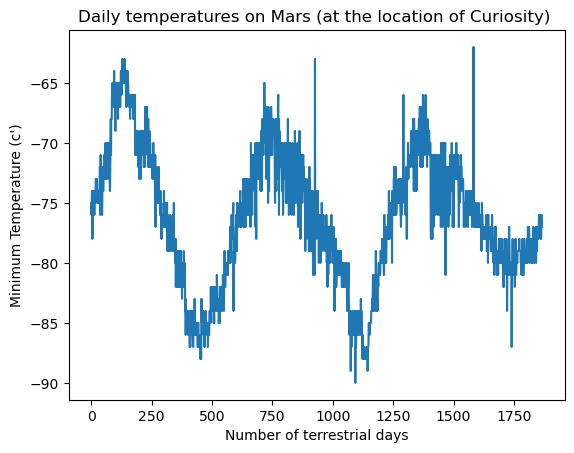

In [97]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Query first date in dataframe and the date one terristrial year later to see how many months have passed. 

mars_weather_sorted_df = mars_weather_df.sort_values('terrestrial_date').reset_index()
avg_temp_per_month_df
plt.plot(mars_weather_df.index, mars_weather_df['min_temp'])
plt.xlabel('Number of terrestrial days')
plt.ylabel("Minimum Temperature (c')")
plt.title('Daily temperatures on Mars (at the location of Curiosity) ')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [91]:
# Write the data to a CSV
mars_weather_df.to_csv('Mars_weather.csv', index=False)

In [92]:
browser.quit()